In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

def analyze_activity(column_name, filter_fn, categorize_fn, sent_df, unsent_df, order_fn=None):
    # Step 1: Check if the column exists in sent dataset
    if column_name not in sent_df.columns:
        raise ValueError(f"{column_name} does not exist in the sent dataset")
    
    # Step 2: Check if the column exists in unsent dataset
    column_exists_in_unsent = column_name in unsent_df.columns

    # Step 3: Create datasets with relevant columns
    sent_filtered_df = sent_df[[column_name, 'jbsteps60', 'jbmins60']].dropna().copy()
    if column_exists_in_unsent:
        unsent_filtered_df = unsent_df[[column_name, 'jbsteps60', 'jbmins60']].dropna().copy()
    
    # Step 4: Apply the filter function only to the column_name column
    sent_filtered_df = sent_filtered_df[sent_filtered_df[column_name].apply(filter_fn)]
    if column_exists_in_unsent:
        unsent_filtered_df = unsent_filtered_df[unsent_filtered_df[column_name].apply(filter_fn)]
    
    # Step 5: Apply the categorization function only to the column_name column
    sent_filtered_df['category'] = sent_filtered_df[column_name].apply(categorize_fn)
    if column_exists_in_unsent:
        unsent_filtered_df['category'] = unsent_filtered_df[column_name].apply(categorize_fn)
    
    # Step 6: Plot the results
    categories = sent_filtered_df['category'].unique()
    if order_fn:
        categories = order_fn(categories)
    x = np.arange(len(categories))  # the label locations
    width = 0.35  # the width of the bars


    # Plot for steps (jbsteps60)
    plt.figure(figsize=(10, 6))
    
    sent_means_steps = [sent_filtered_df[sent_filtered_df['category'] == category]['jbsteps60'].mean() for category in categories]
    if column_exists_in_unsent:
        unsent_means_steps = [unsent_filtered_df[unsent_filtered_df['category'] == category]['jbsteps60'].mean() for category in categories]

    plt.bar(x - width/2, sent_means_steps, width, label='Suggestion Sent', color='#FFB347')  # Light Orange
    if column_exists_in_unsent:
        plt.bar(x + width/2, unsent_means_steps, width, label='Suggestion Not Sent', color='#A8D5BA')  # Light Green

    plt.title(f'Average Steps per Category - {column_name}')
    plt.xlabel('Category')
    plt.ylabel('Average Steps (jbsteps60)')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()  # Only 2 entries in the legend now
    plt.tight_layout()
    plt.show()

    # Plot for minutes (jbmins60)
    plt.figure(figsize=(10, 6))
    
    sent_means_mins = [sent_filtered_df[sent_filtered_df['category'] == category]['jbmins60'].mean() for category in categories]
    if column_exists_in_unsent:
        unsent_means_mins = [unsent_filtered_df[unsent_filtered_df['category'] == category]['jbmins60'].mean() for category in categories]

    plt.bar(x - width/2, sent_means_mins, width, label='Sent', color='#FFB347')  # Light Orange
    if column_exists_in_unsent:
        plt.bar(x + width/2, unsent_means_mins, width, label='Unsent', color='#A8D5BA')  # Light Green

    plt.title(f'Average Minutes Walked per Category - {column_name}')
    plt.xlabel('Category')
    plt.ylabel('Average Minutes (jbmins60)')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend()  # Only 2 entries in the legend now
    plt.tight_layout()
    plt.show()

# Example Usage:
# Define filter function and categorization function
def base_filter(value):
    return True


def base_cat(value):
    return value


In [85]:
# Load datasets
sent_df = pd.read_csv('data/modified_data/Cleaned Dataset.csv')
unsent_df = pd.read_csv('data/modified_data/Cleaned Unsent Dataset.csv')

## Weather Condition

In [86]:
column_name = "dec.weather.condition"
def weather_filter_fn(value):
    return value not in ["com.google.appengine.labs.repackaged.org.json.JSONObject.<init>(JSONObject.java:179)", "com.google.appengine.labs.repackaged.org.json.JSONObject.getJSONObject(JSONObject.java:516)"]



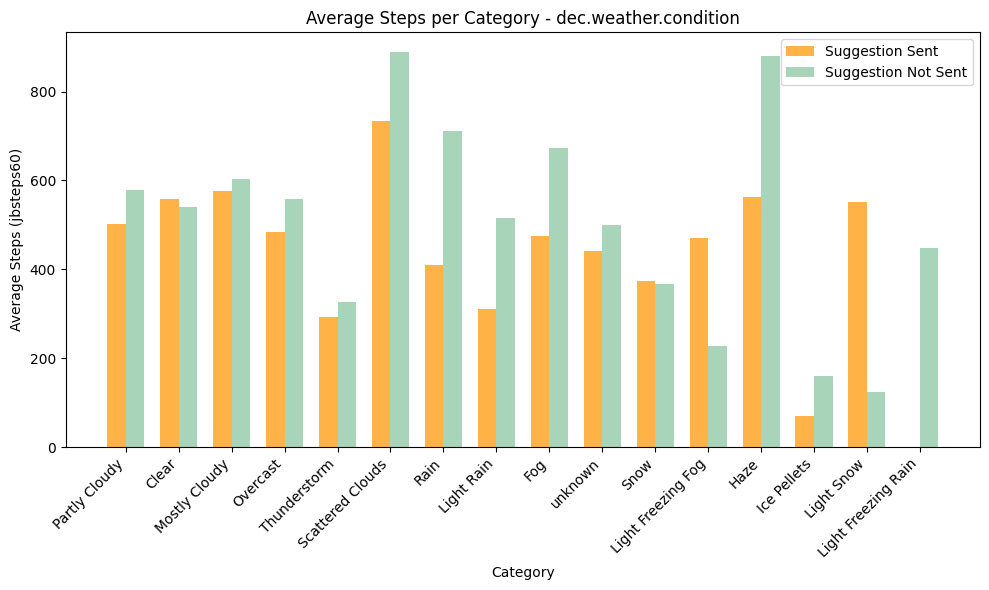

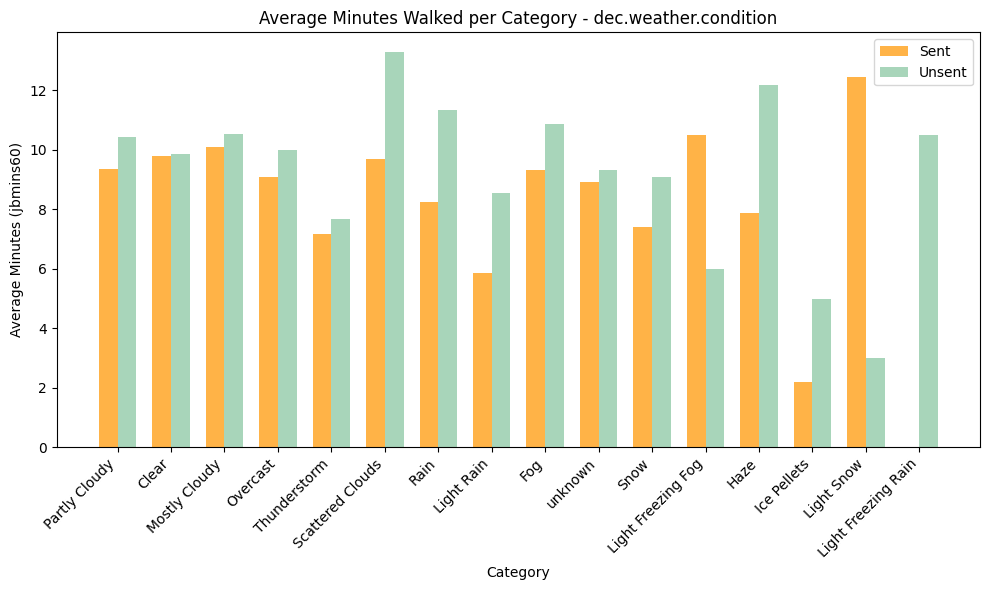

In [87]:
analyze_activity(column_name, weather_filter_fn, base_cat, sent_df, unsent_df)


In [88]:
unsent_df['dec.weather.condition'].unique()

array(['Mostly Cloudy', 'Clear', 'Partly Cloudy', nan, 'Overcast',
       'Thunderstorm', 'Rain', 'Fog', 'Scattered Clouds', 'Light Rain',
       'unknown', 'Light Thunderstorms and Rain', 'Snow',
       'Light Freezing Fog', 'Ice Pellets', 'Light Snow', 'Haze',
       'Light Freezing Rain'], dtype=object)

## Temperature

In [89]:
column_name = "dec.temperature"

def temp_filter(value):
    return value > -20

def categorize_temperature(temp):
    if pd.isna(temp):  # Handle NaN values if necessary
        return 'Unknown'
    
    # Define the bin width
    bin_width = 5
    
    # Determine the lower bound of the bin
    lower_bound = (temp // bin_width) * bin_width
    
    # Create the string label in the form "X-Y°C"
    label = f"{int(lower_bound)}-{int(lower_bound + bin_width - 1)}°C"
    
    return label


def order_temperature_categories(categories):
    # Regular expression to capture negative and positive numbers in the range
    def extract_lower_bound(cat):
        # Use regex to find the first number (including negative numbers)
        match = re.search(r'-?\d+', cat)
        if match:
            return int(match.group())
        return 0  # Default case if no number is found

    # Sort categories by the extracted lower bound of the range
    sorted_categories = sorted(categories, key=extract_lower_bound)
    return sorted_categories


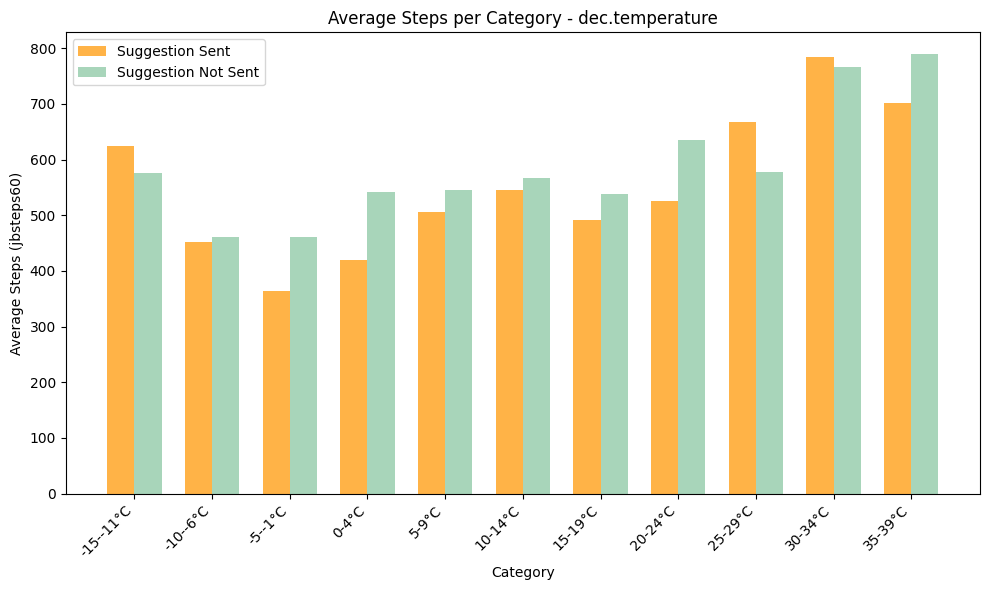

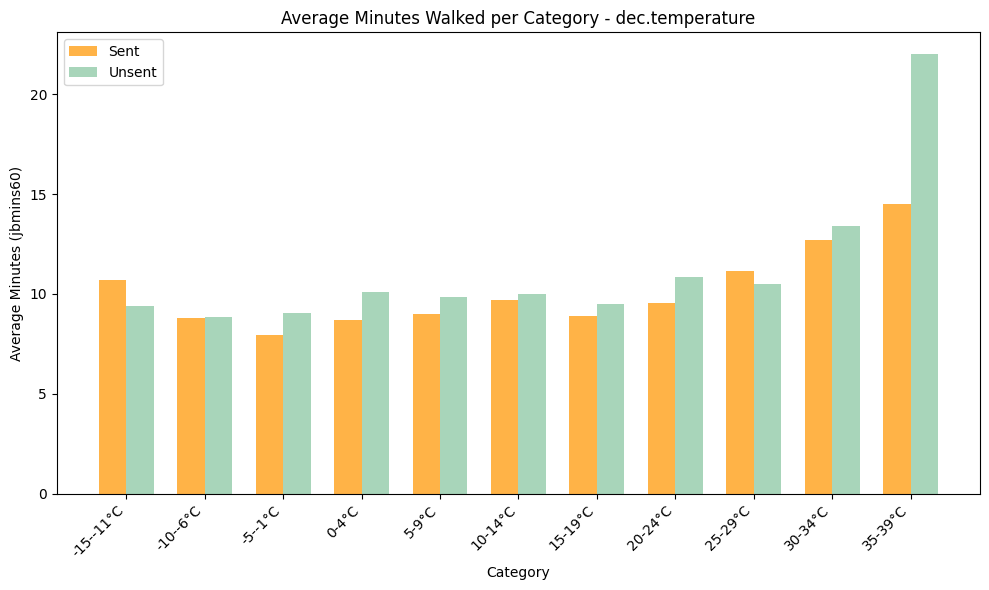

In [90]:
analyze_activity(column_name, temp_filter, categorize_temperature, sent_df, unsent_df, order_temperature_categories)


## Windspeed

In [100]:
column_name = "dec.windspeed"

def filter_windspeed(value):
    if value == "Unknown":
        return False
    else:
        return True


def categorize_windspeed(temp):

    
    # Define the bin width
    bin_width = 5
    
    # Determine the lower bound of the bin
    lower_bound = (float(temp) // bin_width) * bin_width
    
    # Create the string label in the form "X-Y°C"
    label = f"{int(lower_bound)}-{int(lower_bound + bin_width - 1)} m/s"
    
    return label


def order_windspeed_categories(categories):
    # Regular expression to capture negative and positive numbers in the range
    def extract_lower_bound(cat):
        # Use regex to find the first number (including negative numbers)
        match = re.search(r'-?\d+', cat)
        if match:
            return int(match.group())
        return 0  # Default case if no number is found

    # Sort categories by the extracted lower bound of the range
    sorted_categories = sorted(categories, key=extract_lower_bound)
    return sorted_categories


SyntaxError: expected ':' (3070932113.py, line 5)

In [101]:
analyze_activity(column_name, base_filter, categorize_windspeed, sent_df, unsent_df, order_windspeed_categories)


ValueError: could not convert string to float: 'unknown'